# Import libraries

In [ ]:
## Import libraries

import os
import datetime

!pip install pyts
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Model, Sequential
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.backend as K
from PIL import Image
from dateutil.parser import parse
from typing import List
import seaborn as sns
import torch
from torch import optim
import torch.nn as nn
#!pip install -q keras-tcn --no-dependencies
#from tcn import TCN, tcn_full_summary


# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Permute
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteError
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError

from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, SimpleRNN, LSTMCell, MaxPooling1D, Flatten, RepeatVector, GRU, Input

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

!pip install tab2img
from tab2img.converter import Tab2Img

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.8 MB/s eta 0:00:00
Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read CSV file

In [ ]:
df_path = '/content/drive/MyDrive/1min.csv'

# Load CSV file into a Pandas DataFrame
df = pd.read_csv(df_path)

In [ ]:
# view summary statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNIX_sec,118123.0,1.529520e+09,1.048954e+07,1.512747e+09,1.519246e+09,1.529882e+09,1.537639e+09,1.548025e+09
ElevationAngle,118123.0,3.671553e+01,1.555254e+01,1.500000e+01,2.526883e+01,3.226930e+01,4.540940e+01,7.836703e+01
AzimuthAngle,118123.0,1.798533e+02,5.399173e+01,7.162534e+01,1.377247e+02,1.798011e+02,2.220086e+02,2.883586e+02
GSI_W/m^2,118123.0,4.997303e+02,2.480852e+02,9.481026e+00,3.054564e+02,4.883511e+02,6.707411e+02,1.263227e+03
Temperature_◦C,118123.0,1.721917e+01,1.019556e+01,-5.225932e+00,8.625206e+00,1.561113e+01,2.626812e+01,3.812885e+01
DewPoint_◦C,118123.0,-1.651166e+00,9.106979e+00,-3.527766e+01,-8.388889e+00,-2.994168e+00,5.422562e+00,1.727000e+01
AtmosphericPressure_mmHg,118123.0,7.652546e+02,4.056089e+00,7.503160e+02,7.627620e+02,7.655560e+02,7.678927e+02,7.767320e+02
WindDirection_radians,118123.0,3.517959e+00,1.309987e+00,0.000000e+00,2.705591e+00,3.703665e+00,4.356675e+00,6.265732e+00
WindVelocity_mile/s,118123.0,2.000713e+00,2.347106e+00,0.000000e+00,4.023360e-01,1.296416e+00,2.683143e+00,2.324419e+01
RelativeHumidity_%,118123.0,3.310109e+01,1.866100e+01,1.000000e+00,1.852584e+01,3.000000e+01,4.400000e+01,9.500000e+01


In [ ]:
# view info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118123 entries, 0 to 118122
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UNIX_sec                  118123 non-null  float64
 1   ElevationAngle            118123 non-null  float64
 2   AzimuthAngle              118123 non-null  float64
 3   GSI_W/m^2                 118123 non-null  float64
 4   Temperature_◦C            118123 non-null  float64
 5   DewPoint_◦C               118123 non-null  float64
 6   AtmosphericPressure_mmHg  118123 non-null  float64
 7   WindDirection_radians     118123 non-null  float64
 8   WindVelocity_mile/s       118123 non-null  float64
 9   RelativeHumidity_%        118123 non-null  float64
 10  readable_datetime         118123 non-null  object 
dtypes: float64(10), object(1)
memory usage: 9.9+ MB


## Preprocess dataframe

In [ ]:
# sub-set of columns to be used for model training
df = df[['ElevationAngle', 'AzimuthAngle', 'GSI_W/m^2',
        'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
        'WindDirection_radians', 'WindVelocity_mile/s', 'RelativeHumidity_%',
        'readable_datetime']]

# change readable_datetime to datetime64 data type
df['readable_datetime'] = pd.to_datetime(df['readable_datetime'], infer_datetime_format=True)

# set readable_datetime as row index
df.set_index(df.readable_datetime,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ElevationAngle            118123 non-null  float64       
 1   AzimuthAngle              118123 non-null  float64       
 2   GSI_W/m^2                 118123 non-null  float64       
 3   Temperature_◦C            118123 non-null  float64       
 4   DewPoint_◦C               118123 non-null  float64       
 5   AtmosphericPressure_mmHg  118123 non-null  float64       
 6   WindDirection_radians     118123 non-null  float64       
 7   WindVelocity_mile/s       118123 non-null  float64       
 8   RelativeHumidity_%        118123 non-null  float64       
 9   readable_datetime         118123 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 9.9 MB


<ipython-input-5-17a1b75015af>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readable_datetime'] = pd.to_datetime(df['readable_datetime'], infer_datetime_format=True)


## Feature engineering

AzimuthAngle & ElevationAngle are given in units of degrees while WindDirection_radians is given in radians. Angles do not make good model inputs: 360° and 0° should be close to each other and wrap around smoothly. Therefore, You can replace every periodic feature x with two features cos(x) and sin(x) after normalizing to radians. By expressing your feature as 2 dimensions, instead of one you can easily avoid this problem - simply push it through cosine and sine, this way you change your angle into a point on a unit circle. Since these AzimuthAngle & ElevationAngle are your target variable you will then have 4 target variables with respect to cos(y) and sin(y). (NOTE: Look for some research supporting this and cite it)

In [ ]:
# Convert to radians.
df['ElevationAngle_rad'] = df['ElevationAngle']*np.pi / 180
df['AzimuthAngle_rad'] = df['AzimuthAngle']*np.pi / 180

In [ ]:
# Calculate the wind x and y components.
df['ElevationAngle_cos'] = np.cos(df['ElevationAngle_rad'])
df['ElevationAngle_sin'] = np.sin(df['ElevationAngle_rad'])
df['AzimuthAngle_sin'] = np.cos(df['AzimuthAngle_rad'])
df['AzimuthAngle_cos'] = np.sin(df['AzimuthAngle_rad'])
df['WindDirection_radians_cos'] = np.cos(df['WindDirection_radians'])
df['WindDirection_radians_sin'] = np.sin(df['WindDirection_radians'])

In [ ]:
df.head()

,ElevationAngle,AzimuthAngle,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindDirection_radians,WindVelocity_mile/s,RelativeHumidity_%,readable_datetime,ElevationAngle_rad,AzimuthAngle_rad,ElevationAngle_cos,ElevationAngle_sin,AzimuthAngle_sin,AzimuthAngle_cos,WindDirection_radians_cos,WindDirection_radians_sin
readable_datetime,,,,,,,,,,,,,,,,,,
2017-12-08 08:36:04,15.000023,132.825735,247.350955,-1.412616,-10.952546,770.073760,1.909132,0.507345,48.213543,2017-12-08 08:36:04,0.261800,2.318246,0.965926,0.258819,-0.679771,0.733425,-0.331917,0.943309
2017-12-08 08:37:00,15.137937,132.992499,247.783427,-1.401186,-10.975406,770.099889,2.149721,0.456758,48.110672,2017-12-08 08:37:00,0.264207,2.321157,0.965300,0.261144,-0.681903,0.731443,-0.547124,0.837052
2017-12-08 08:38:00,15.286575,133.173234,251.524191,-1.388961,-11.000060,770.128000,2.408999,0.402635,48.000000,2017-12-08 08:38:00,0.266801,2.324311,0.964619,0.263647,-0.684206,0.729288,-0.743443,0.668800
2017-12-08 08:39:00,15.434081,133.353636,252.733730,-1.404770,-11.013234,770.128000,2.506673,0.468360,48.000000,2017-12-08 08:39:00,0.269376,2.327460,0.963937,0.266130,-0.686499,0.727130,-0.805120,0.593113
2017-12-08 08:40:00,15.581838,133.535402,255.725885,-1.420652,-11.026469,770.128000,2.604800,0.534389,48.000000,2017-12-08 08:40:00,0.271954,2.330632,0.963248,0.268614,-0.688803,0.724949,-0.859353,0.511382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ElevationAngle             118123 non-null  float64       
 1   AzimuthAngle               118123 non-null  float64       
 2   GSI_W/m^2                  118123 non-null  float64       
 3   Temperature_◦C             118123 non-null  float64       
 4   DewPoint_◦C                118123 non-null  float64       
 5   AtmosphericPressure_mmHg   118123 non-null  float64       
 6   WindDirection_radians      118123 non-null  float64       
 7   WindVelocity_mile/s        118123 non-null  float64       
 8   RelativeHumidity_%         118123 non-null  float64       
 9   readable_datetime          118123 non-null  datetime64[ns]
 10  ElevationAngle_rad         118123 non-null  float64       
 11  AzimuthAngle_rad  

In [ ]:
df = df[['readable_datetime', 'ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin', 'GSI_W/m^2', 'Temperature_◦C',
         'DewPoint_◦C', 'AtmosphericPressure_mmHg', 'WindVelocity_mile/s', 'RelativeHumidity_%']]

#### Time

Similarly, the Date Time column is very useful, but not in this string form. Start by converting it to seconds:

In [ ]:
# save date_time object from readable_datetime with specified format
date_time = pd.to_datetime(df.pop('readable_datetime'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
# cocnvert date_time object to seconds and save in dataframe
df['timestamp_s'] = date_time.map(pd.Timestamp.timestamp)

Similar to the other angle features, the time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals:

In [ ]:
day = 24*60*60
week = 24*60*60*7
month = 24*60*60*30
year = (365.2425)*day

df['Day sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / day))
df['Day cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / day))
#df['Week sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / week))
#df['Week cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / week))
# df['Month sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / month))
# df['Month cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / month))
df['Year sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / year))

In [ ]:
df.head(2)

,ElevationAngle_cos,ElevationAngle_sin,WindDirection_radians_cos,WindDirection_radians_sin,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindVelocity_mile/s,RelativeHumidity_%,timestamp_s,Day sin,Day cos,Year sin,Year cos
readable_datetime,,,,,,,,,,,,,,,
2017-12-08 08:36:04,0.965926,0.258819,-0.331917,0.943309,247.350955,-1.412616,-10.952546,770.073760,0.507345,48.213543,1.512722e+09,0.776963,-0.629546,-0.389887,0.920863
2017-12-08 08:37:00,0.965300,0.261144,-0.547124,0.837052,247.783427,-1.401186,-10.975406,770.099889,0.456758,48.110672,1.512722e+09,0.774393,-0.632705,-0.389876,0.920867


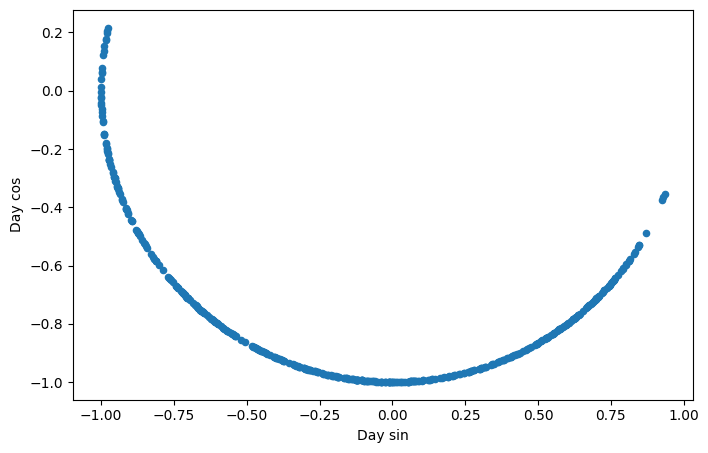

In [ ]:
df.sample(500).plot.scatter('Day sin', 'Day cos').set_aspect('equal')

In [ ]:
#plt.plot(np.array(df['Day sin'])[:5000])
#plt.plot(np.array(df['Day cos'])[:5000])
#plt.xlabel('Time [h]')
#plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

#### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling.
The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.
It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [ ]:
df = df[['ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin',
         'GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
         'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
         'RelativeHumidity_%','Day sin', 'Day cos',
         'Year sin', 'Year cos']]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]


y_train = train_df[['ElevationAngle_cos','ElevationAngle_sin']]
y_test = test_df[['ElevationAngle_cos','ElevationAngle_sin']]
y_val = val_df[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_df = train_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_df = val_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_df = test_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]

#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_min_max = df[0:int(n*0.7)]
val_min_max = df[int(n*0.7):int(n*0.9)]
test_min_max = df[int(n*0.9):]


y_train_min_max = train_min_max[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_min_max = val_min_max[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_min_max = test_min_max[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_min_max = train_min_max[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_min_max = test_min_max[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_min_max = test_min_max[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]

#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_max_abs_val = df[0:int(n*0.7)]
val_max_abs_val = df[int(n*0.7):int(n*0.9)]
test_max_abs_val = df[int(n*0.9):]



y_train_max_abs_val = train_max_abs_val[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_max_abs_val = val_max_abs_val[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_max_abs_val = test_max_abs_val[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_max_abs_val = train_max_abs_val[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_max_abs_val = val_max_abs_val[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_max_abs_val = test_max_abs_val[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]

#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_z_score = df[0:int(n*0.7)]
val_z_score = df[int(n*0.7):int(n*0.9)]
test_z_score = df[int(n*0.9):]



y_train_z_score = train_z_score[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_z_score = val_z_score[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_z_score = test_z_score[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_z_score = train_z_score[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_z_score = val_z_score[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_z_score = test_z_score[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]
#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_median = df[0:int(n*0.7)]
val_median = df[int(n*0.7):int(n*0.9)]
test_median = df[int(n*0.9):]



y_train_median = train_median[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_median = val_median[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_median = test_median[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_median = train_median[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_median = val_median[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_median = test_median[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]
#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_Sigmoid = df[0:int(n*0.7)]
val_Sigmoid = df[int(n*0.7):int(n*0.9)]
test_Sigmoid = df[int(n*0.9):]



y_train_Sigmoid = train_Sigmoid[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_Sigmoid = val_Sigmoid[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_Sigmoid = test_Sigmoid[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_Sigmoid = train_Sigmoid[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_Sigmoid = val_Sigmoid[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_Sigmoid = test_Sigmoid[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]
#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_MMAD = df[0:int(n*0.7)]
val_MMAD = df[int(n*0.7):int(n*0.9)]
test_MMAD = df[int(n*0.9):]


y_train_MMAD = train_MMAD[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_MMAD = val_MMAD[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_MMAD = test_MMAD[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_MMAD = train_MMAD[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_MMAD = val_MMAD[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_MMAD = test_MMAD[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]
#num_features = df.shape[1]

In [ ]:
# split data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_Tanh = df[0:int(n*0.7)]
val_Tanh = df[int(n*0.7):int(n*0.9)]
test_Tanh = df[int(n*0.9):]


y_train_Tanh = train_Tanh[['ElevationAngle_cos','ElevationAngle_sin']]
y_val_Tanh = val_Tanh[['ElevationAngle_cos','ElevationAngle_sin']]
y_test_Tanh = test_Tanh[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_Tanh = train_Tanh[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos']]
val_Tanh = val_Tanh[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos']]
test_Tanh = test_Tanh[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos']]
#num_features = df.shape[1]

##### scaling the data.

To begin with, we have standard scaler and minmax scaler tried independently.

Best practice requires that we scale the data using the mean and standard deviation of the train dataset. Then use those parameters to scale the validation and test dataset

Before saving the data, we must scale it so all values are between 0 and 1. This
decreases the time required for training deep learning models, and it improves their
performance. We’ll use MinMaxScaler from sklearn to scale our data.
Note that we will fit the scaler on the training set to avoid data leakage. That way,
we are simulating the fact that we only have the training data available when we’re
using the model, and no future information is known by the model. The evaluation of
the model remains unbiased.

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(train_df)

# train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
# val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
# test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])



from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Normalization using Min-Max Scaling
min_max_scaler = MinMaxScaler()
train_min_max[train_min_max.columns] = min_max_scaler.fit_transform(train_min_max[train_min_max.columns])
val_min_max[val_min_max.columns] = min_max_scaler.transform(val_min_max[val_min_max.columns])
test_min_max[test_min_max.columns] = min_max_scaler.transform(test_min_max[test_min_max.columns])

# train_min_max = pd.concat([y_train, train_min_max], axis=1)
# val_min_max = pd.concat([y_val, val_min_max], axis=1)
# test_min_max = pd.concat([y_test, test_min_max], axis=1)

# Normalization using Decimal Scaling
max_abs_val = np.max(np.abs(train_max_abs_val))
scaling_factor = 10 ** np.ceil(np.log10(max_abs_val))
train_max_abs_val[train_max_abs_val.columns] /= scaling_factor
val_max_abs_val[val_max_abs_val.columns] /= scaling_factor
test_max_abs_val[test_max_abs_val.columns] /= scaling_factor

# train_max_abs_val = pd.concat([y_train, test_max_abs_val], axis=1)
# val_max_abs_val = pd.concat([y_val, test_max_abs_val], axis=1)
# test_max_abs_val = pd.concat([y_test, test_max_abs_val], axis=1)

# Normalization using Z-Score
z_score_scaler = StandardScaler()
train_z_score[train_z_score.columns] = z_score_scaler.fit_transform(train_z_score[train_z_score.columns])
val_z_score[val_z_score.columns] = z_score_scaler.transform(val_z_score[val_z_score.columns])
test_z_score[test_z_score.columns] = z_score_scaler.transform(test_z_score[test_z_score.columns])

# train_z_score = pd.concat([y_train, train_z_score], axis=1)
# val_z_score = pd.concat([y_val, val_z_score], axis=1)
# test_z_score = pd.concat([y_test, test_z_score], axis=1)

# Normalization using Median Scaling
median = np.median(train_median)
train_median[train_median.columns] -= median
val_median[val_median.columns] -= median
test_median[test_median.columns] -= median

# train_median = pd.concat([y_train, train_median], axis=1)
# val_median = pd.concat([y_val, val_median], axis=1)
# test_median = pd.concat([y_test, test_median], axis=1)

# Normalization using Sigmoid Transformation
train_Sigmoid[train_Sigmoid.columns] = 1 / (1 + np.exp(-train_Sigmoid[train_Sigmoid.columns]))
val_Sigmoid[val_Sigmoid.columns] = 1 / (1 + np.exp(-val_Sigmoid[val_Sigmoid.columns]))
test_Sigmoid[test_Sigmoid.columns] = 1 / (1 + np.exp(-test_Sigmoid[test_Sigmoid.columns]))

# train_Sigmoid = pd.concat([y_train, train_Sigmoid], axis=1)
# val_Sigmoid = pd.concat([y_val, val_Sigmoid], axis=1)
# test_Sigmoid = pd.concat([y_test, test_Sigmoid], axis=1)

# Normalization using Median and Median Absolute Deviation (MAD)
median = np.median(train_MMAD)
mad = np.median(np.abs(train_MMAD - median))
train_MMAD[train_MMAD.columns] = (train_MMAD[train_MMAD.columns] - median) / mad
val_MMAD[val_MMAD.columns] = (val_MMAD[val_MMAD.columns] - median) / mad
test_MMAD[test_MMAD.columns] = (test_MMAD[test_MMAD.columns] - median) / mad

# train_MMAD = pd.concat([y_train, train_MMAD], axis=1)
# val_MMAD = pd.concat([y_val, val_MMAD], axis=1)
# test_MMAD = pd.concat([y_test, test_MMAD], axis=1)

# Normalization using Hyperbolic Tangent (Tanh)
train_Tanh[train_Tanh.columns] = np.tanh(train_Tanh[train_Tanh.columns])
val_Tanh[val_Tanh.columns] = np.tanh(val_Tanh[val_Tanh.columns])
test_Tanh[test_Tanh.columns] = np.tanh(test_Tanh[test_Tanh.columns])

# train_Tanh = pd.concat([y_train, train_Tanh], axis=1)
# val_Tanh = pd.concat([y_val, val_Tanh], axis=1)
# test_Tanh = pd.concat([y_test, test_Tanh], axis=1)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
train_df = pd.concat([train_min_max, train_max_abs_val], axis=1)
val_df = pd.concat([val_min_max, val_max_abs_val], axis=1)
test_df = pd.concat([test_min_max, test_max_abs_val], axis=1)

train_norm = [train_min_max, train_max_abs_val, train_z_score, train_median, train_Sigmoid, train_MMAD, train_Tanh]
val_norm = [val_min_max, val_max_abs_val, val_z_score, val_median, val_Sigmoid, val_MMAD, val_Tanh]
test_norm = [test_min_max, test_max_abs_val, test_z_score, test_median, test_Sigmoid, test_MMAD, test_Tanh]

In [ ]:
import itertools
import pandas as pd

# List of dataframes
train_dataframes = [train_min_max, train_max_abs_val, train_z_score, train_median, train_Sigmoid, train_MMAD, train_Tanh]

# List of combination names
combination_names = ['Min-Max', 'Max-Abs-Val', 'Z-Score', 'Median', 'Sigmoid', 'Median-MAD', 'Tanh']

# Additional dataframe with two columns
# additional_df = pd.DataFrame({'Column1': [1, 2, 3, 4], 'Column2': [5, 6, 7, 8]})

# Generate all permutations
train_permutations = []
train_permutation_indices = []

for r in range(1, 3):
  permutations = list(itertools.permutations(range(len(train_dataframes)), r)) # Generate permutations of length 2
  train_permutations.extend(permutations)
  train_permutation_indices.extend(permutation for permutation in permutations)

# Perform permutations and store in separate dataframes with corresponding names
train_permutation_dataframes = {}
for permutation, indices in zip(train_permutations, train_permutation_indices):
    train_combined_df = pd.concat([train_dataframes[idx] for idx in indices], axis=1)
    permutation_name = ' + '.join([combination_names[idx] for idx in indices])

    # Concatenate with additional dataframe
    train_combined_df = pd.concat([y_train, train_combined_df], axis=1)

    train_permutation_dataframes[permutation_name] = train_combined_df

# Print the permutation dataframes
# for permutation_name, df in train_permutation_dataframes.items():
#     print(f"Permutation: {permutation_name}")
#     print(df.head())
#     print()


In [ ]:
# Print the permutation dataframes
for permutation_name, df in train_permutation_dataframes.items():
    print(f"Permutation: {permutation_name}")
    print(df.columns)
    print()

Permutation: Min-Max
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Max-Abs-Val
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Z-Score
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Median
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg'

In [ ]:
# Access each dataframe and assign variable names
for permutation_name, df in train_permutation_dataframes.items():
    # Remove any special characters or spaces from the permutation name to create a valid variable name
    train_variable_name = 'train_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    locals()[train_variable_name] = df

# Print all variable names
for permutation_name in train_permutation_dataframes.keys():
    train_variable_name = 'train_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    print(train_variable_name)

train_min_max
train_max_abs_val
train_z_score
train_median
train_sigmoid
train_median_mad
train_tanh
train_min_max___max_abs_val
train_min_max___z_score
train_min_max___median
train_min_max___sigmoid
train_min_max___median_mad
train_min_max___tanh
train_max_abs_val___min_max
train_max_abs_val___z_score
train_max_abs_val___median
train_max_abs_val___sigmoid
train_max_abs_val___median_mad
train_max_abs_val___tanh
train_z_score___min_max
train_z_score___max_abs_val
train_z_score___median
train_z_score___sigmoid
train_z_score___median_mad
train_z_score___tanh
train_median___min_max
train_median___max_abs_val
train_median___z_score
train_median___sigmoid
train_median___median_mad
train_median___tanh
train_sigmoid___min_max
train_sigmoid___max_abs_val
train_sigmoid___z_score
train_sigmoid___median
train_sigmoid___median_mad
train_sigmoid___tanh
train_median_mad___min_max
train_median_mad___max_abs_val
train_median_mad___z_score
train_median_mad___median
train_median_mad___sigmoid
train_media

In [ ]:
import itertools
import pandas as pd

# List of dataframes
val_dataframes = [val_min_max, val_max_abs_val, val_z_score, val_median, val_Sigmoid, val_MMAD, val_Tanh]

# List of combination names
combination_names = ['Min-Max', 'Max-Abs-Val', 'Z-Score', 'Median', 'Sigmoid', 'Median-MAD', 'Tanh']

# Additional dataframe with two columns
#additional_df = pd.DataFrame({'Column1': [1, 2, 3, 4], 'Column2': [5, 6, 7, 8]})

# Generate all permutations
val_permutations = []
val_permutation_indices = []

for r in range(1, 3):
  permutations = list(itertools.permutations(range(len(val_dataframes)), r)) # Generate permutations of length 2
  val_permutations.extend(permutations)
  val_permutation_indices.extend(permutation for permutation in permutations)

# Perform permutations and store in separate dataframes with corresponding names
val_permutation_dataframes = {}
for permutation, indices in zip(val_permutations, val_permutation_indices):
    val_combined_df = pd.concat([val_dataframes[idx] for idx in indices], axis=1)
    permutation_name = ' + '.join([combination_names[idx] for idx in indices])

    # Concatenate with additional dataframe
    val_combined_df = pd.concat([y_val, val_combined_df], axis=1)

    val_permutation_dataframes[permutation_name] = val_combined_df

# # Print the permutation dataframes
# for permutation_name, df in val_permutation_dataframes.items():
#     print(f"Permutation: {permutation_name}")
#     print(df.head())
#     print()

In [ ]:
# Print the permutation dataframes
for permutation_name, df in val_permutation_dataframes.items():
    print(f"Permutation: {permutation_name}")
    print(df.columns)
    print()

Permutation: Min-Max
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Max-Abs-Val
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Z-Score
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Median
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg'

In [ ]:
# Access each dataframe and assign variable names
for permutation_name, df in val_permutation_dataframes.items():
    # Remove any special characters or spaces from the permutation name to create a valid variable name
    val_variable_name = 'val_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    locals()[val_variable_name] = df

# Print all variable names
for permutation_name in val_permutation_dataframes.keys():
    val_variable_name = 'val_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    print(val_variable_name)

val_min_max
val_max_abs_val
val_z_score
val_median
val_sigmoid
val_median_mad
val_tanh
val_min_max___max_abs_val
val_min_max___z_score
val_min_max___median
val_min_max___sigmoid
val_min_max___median_mad
val_min_max___tanh
val_max_abs_val___min_max
val_max_abs_val___z_score
val_max_abs_val___median
val_max_abs_val___sigmoid
val_max_abs_val___median_mad
val_max_abs_val___tanh
val_z_score___min_max
val_z_score___max_abs_val
val_z_score___median
val_z_score___sigmoid
val_z_score___median_mad
val_z_score___tanh
val_median___min_max
val_median___max_abs_val
val_median___z_score
val_median___sigmoid
val_median___median_mad
val_median___tanh
val_sigmoid___min_max
val_sigmoid___max_abs_val
val_sigmoid___z_score
val_sigmoid___median
val_sigmoid___median_mad
val_sigmoid___tanh
val_median_mad___min_max
val_median_mad___max_abs_val
val_median_mad___z_score
val_median_mad___median
val_median_mad___sigmoid
val_median_mad___tanh
val_tanh___min_max
val_tanh___max_abs_val
val_tanh___z_score
val_tanh___m

In [ ]:
import itertools
import pandas as pd

# List of dataframes
test_dataframes = [test_min_max, test_max_abs_val, test_z_score, test_median, test_Sigmoid, test_MMAD, test_Tanh]

# List of combination names
combination_names = ['Min-Max', 'Max-Abs-Val', 'Z-Score', 'Median', 'Sigmoid', 'Median-MAD', 'Tanh']

# Additional dataframe with two columns
#additional_df = pd.DataFrame({'Column1': [1, 2, 3, 4], 'Column2': [5, 6, 7, 8]})

# Generate all permutations
test_permutations = []
test_permutation_indices = []

for r in range(1, 3):
  permutations = list(itertools.permutations(range(len(test_dataframes)), r)) # Generate permutations of length 2
  test_permutations.extend(permutations)
  test_permutation_indices.extend(permutation for permutation in permutations)

# Perform permutations and store in separate dataframes with corresponding names
test_permutation_dataframes = {}
for permutation, indices in zip(test_permutations, test_permutation_indices):
    test_combined_df = pd.concat([test_dataframes[idx] for idx in indices], axis=1)
    permutation_name = ' + '.join([combination_names[idx] for idx in indices])

    # Concatenate with additional dataframe
    test_combined_df = pd.concat([y_test, test_combined_df], axis=1)

    test_permutation_dataframes[permutation_name] = test_combined_df

# # Print the permutation dataframes
# for permutation_name, df in test_permutation_dataframes.items():
#     print(f"Permutation: {permutation_name}")
#     print(df.head())
#     print()


In [ ]:
# Print the permutation dataframes
for permutation_name, df in test_permutation_dataframes.items():
    print(f"Permutation: {permutation_name}")
    print(df.columns)
    print()

Permutation: Min-Max
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Max-Abs-Val
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Z-Score
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
       'WindVelocity_mile/s', 'RelativeHumidity_%', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

Permutation: Median
Index(['ElevationAngle_cos', 'ElevationAngle_sin', 'GSI_W/m^2',
       'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg'

In [ ]:
# Access each dataframe and assign variable names
for permutation_name, df in test_permutation_dataframes.items():
    # Remove any special characters or spaces from the permutation name to create a valid variable name
    test_variable_name = 'test_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    locals()[test_variable_name] = df

# Print all variable names
for permutation_name in test_permutation_dataframes.keys():
    test_variable_name = 'test_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
    print(test_variable_name)

test_min_max
test_max_abs_val
test_z_score
test_median
test_sigmoid
test_median_mad
test_tanh
test_min_max___max_abs_val
test_min_max___z_score
test_min_max___median
test_min_max___sigmoid
test_min_max___median_mad
test_min_max___tanh
test_max_abs_val___min_max
test_max_abs_val___z_score
test_max_abs_val___median
test_max_abs_val___sigmoid
test_max_abs_val___median_mad
test_max_abs_val___tanh
test_z_score___min_max
test_z_score___max_abs_val
test_z_score___median
test_z_score___sigmoid
test_z_score___median_mad
test_z_score___tanh
test_median___min_max
test_median___max_abs_val
test_median___z_score
test_median___sigmoid
test_median___median_mad
test_median___tanh
test_sigmoid___min_max
test_sigmoid___max_abs_val
test_sigmoid___z_score
test_sigmoid___median
test_sigmoid___median_mad
test_sigmoid___tanh
test_median_mad___min_max
test_median_mad___max_abs_val
test_median_mad___z_score
test_median_mad___median
test_median_mad___sigmoid
test_median_mad___tanh
test_tanh___min_max
test_tanh_

In [ ]:
for (train_permutation_name, train_df), (val_permutation_name, val_df), (test_permutation_name, test_df) in zip(train_permutation_dataframes.items(), val_permutation_dataframes.items(), test_permutation_dataframes.items()):
  train_variable_name = 'train_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[train_variable_name] = df
  val_variable_name = 'val_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[val_variable_name] = df
  test_variable_name = 'test_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[test_variable_name] = df

It is worth mentioning why the data is scaled and not normalized. Scaling and normalization
can be confusing terms for data scientists, as they are often used interchangeably.
In short, scaling the data affects only its scale and not its distribution. Thus, it
simply forces the values into a certain range. In our case, we force the values to be
between 0 and 1.
Normalizing the data, on the other hand, affects its distribution and its scale. Thus,
normalizing the data would force it to have a normal distribution or a Gaussian distribution.
The original range would also change, and plotting the frequency of each
value would generate a classic bell curve.
Normalizing the data is only useful when the models we use require the data to
be normal. For example, linear discriminant analysis (LDA) is derived from the
assumption of a normal distribution, so it is better to normalize data before using
LDA. However, in the case of deep learning, no assumptions are made, so normalizing
is not required.

### Data windowing

For deep learning models, we do not have a set of functions to try. Instead, we let
the neural network derive its own function such that when it takes the inputs, it generates
the best predictions possible. To achieve that, we perform what is called data windowing.
This is a process in which we define a sequence of data points on our time
series and define which are inputs and which are labels. That way, the deep learning
model can fit on the inputs, generate predictions, compare them to the labels, and
repeat this process until it cannot improve the accuracy of its predictions.

Let’s walk through an example of data windowing. Our data window will use 24
hours of data to predict the next 24 hours. You probably wonder why are we using just
24 hours of data to generate predictions. After all, deep learning is data hungry and is
used for large datasets. The key lies in the data window. A single window has 24 timesteps
as input to generate an output of 24 timesteps. However, the entire training set is
separated into multiple windows, meaning that we have many windows with inputs
and labels,

To make computation more efficient, deep learning models are trained with batches. A
batch is simply a collection of data windows that are fed to the model for training

An example of a batch with a batch size of 32. That means that
32 data windows are grouped together and used to train the model. Of course, this is
only one batch—the DataWindow class generates as many batches as possible with the
given training set. In our case, we have a training set with 12,285 rows. If each batch
has 32 data windows, that means that we will have 12285/32 = 384 batches.
Training the model on all 384 batches once is called one epoch. One epoch often
does not result in an accurate model, so the model will train for as many epochs as
necessary until it cannot improve the accuracy of its predictions.
The final important concept in data windowing for deep learning is shuffling. I
mentioned in the very first chapter of this book that time series data cannot be shuffled.
Time series data has an order, and that order must be kept, so why are we shuffling
the data here?
In this context, shuffling occurs at the batch level, not inside the data window—
the order of the time series itself is maintained within each data window. Each data
window is independent of all others. Therefore, in a batch, we can shuffle the data windows and still keep the order of our time series, as shown in figure 13.5. Shuffling
the data is not essential, but it is recommended as it tends to make more
robust models.

The window class is based on the width of the input, the width of the label, and the shift.
The width of the input is simply the number of timesteps that are fed into the model
to make predictions. For example, given that we have hourly data in our dataset, if we
feed the model with 24 hours of data to make a prediction, the input width is 24. If we
feed only 12 hours of data, the input width is 12.
The label width is equivalent to the number of timesteps in the predictions. If we
predict only one timestep, the label width is 1. If we predict a full day of data (with
hourly data), the label width is 24.
Finally, the shift is the number of timesteps separating the input and the predictions.
If we predict the next timestep, the shift is 1. If we predict the next 24 hours
(with hourly data), the shift is 24.

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

The width (number of time steps) of the input and label windows.
The time offset between them.
Which features are used as inputs, labels, or both.
This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

Single-output, and multi-output predictions.
Single-time-step and multi-time-step predictions.
This section focuses on implementing the data windowing so that it can be reused for all of those models.

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

    1.For example, to make a single prediction 24 minutes into the future, given 24 minutes of history.
    2.A model that makes a prediction one minutes into the future, given six minutes of history

The rest of this section defines a WindowGenerator class. This class can:

Handle the indexes and offsets as shown in the diagrams above.
Split windows of features into (features, labels) pairs.
Plot the content of the resulting windows.
Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
#### 1. Indexes and offsets

Start by creating the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.

#### Implementing the DataWindow class

In [ ]:
# class DataWindow():
#     def __init__(self, input_width, label_width, shift,
#                  train_df=train_df, val_df=val_df, test_df=test_df,
#                  label_columns=None):

#         self.train_df = train_df
#         self.val_df = val_df
#         self.test_df = test_df

#         self.label_columns = label_columns # Name of the column that we wish to predict
#         if label_columns is not None:
#             self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} # Create a dictionary with the name and index of the label column. This will be used for plotting.
#             self.column_indices = {name: i for i, name in enumerate(train_df.columns)} # Create a dictionary with the nameand index of each column. This will be used to separate the features from the target variable.

#             self.input_width = input_width
#             self.label_width = label_width
#             self.shift = shift

#             self.total_window_size = input_width + shift

#             self.input_slice = slice(0, input_width) # The slice function returns a slice object that specifies how to slice a sequence. In this case, it says that the input slice starts at 0 and ends when we reach the input_width.
#             self.input_indices = np.arange(self.total_window_size)[self.input_slice] # Assign indices to the inputs. These are useful for plotting.

#             self.label_start = self.total_window_size - self.label_width # Get the index at which the label starts. In this case, it is the total window size minus the width of the label.
#             self.labels_slice = slice(self.label_start, None) # The same steps that were applied for the inputs are applied for labels.
#             self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

#     """
#     In the code above, we can see that the initialization function basically assigns the variables
#     and manages the indices of the inputs and the labels. Our next step is to split our
#     window between inputs and labels, so that our models can make predictions based on
#     the inputs and measure an error metric against the labels. The following split_to_
#     inputs_labels function is defined within the DataWindow class.
#     """


#     def split_to_inputs_labels(self, features):
#         inputs = features[:, self.input_slice, :] # Slice the window to get the inputs using the input_slice defined in __init__.
#         labels = features[:, self.labels_slice, :] # Slice the window to get the labels using the labels_slice defined in __init__.
#         if self.label_columns is not None: # If we have more than one target, we stack the labels.
#             labels = tf.stack(
#                 [labels[:,:,self.column_indices[name]] for name in self.label_columns],
#                 axis=-1)

#         inputs.set_shape([None, self.input_width, None]) # The shape will be [batch, time, features]. At this point, we only specify the time dimension and allow the batch and feature dimensions to be defined later.
#         labels.set_shape([None, self.label_width, None])

#         return inputs, labels

#     """
#     The split_to_inputs_labels function will separate the big data window into two
#     windows: one for the inputs and the other for the labels
#     """

#     """
#     Next we’ll define a function to plot the input data, the predictions, and the actual values. Since we will be working with many time windows, we’ll show only
#     the plot of three time windows, but this parameter can easily be changed. Also, the
#     default label will be ElevationAngle_cos, but we can change that by specifying any column
#     we choose. This function is included in the DataWindow class.
#     """

#     def plot(self, model=None, plot_col='ElevationAngle_cos', max_subplots=3):
#         inputs, labels = self.sample_batch

#         plt.figure(figsize=(12, 8))
#         plot_col_index = self.column_indices[plot_col]
#         max_n = min(max_subplots, len(inputs))

#         for n in range(max_n):
#             plt.subplot(3, 1, n+1)
#             plt.ylabel(f'{plot_col} [scaled]')
#             plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10) # Plot the inputs. They will appear as a continuous blue line with dots.

#             if self.label_columns:
#                 label_col_index = self.label_columns_indices.get(plot_col, None)

#             else:
#                 label_col_index = plot_col_index

#             if label_col_index is None:
#                 continue

#             plt.scatter(self.label_indices, labels[n, :, label_col_index],
#                         edgecolors='k', marker='s', label='Labels', c='green', s=64) # Plot the labels or actual values. They will appear as green squares.

#             if model is not None:
#                 predictions = model(inputs)
#                 plt.scatter(self.label_indices, predictions[n, :, label_col_index],
#                             marker='X', edgecolors='k', label='Predictions',  c='red', s=64) # Plot the predictions. They will appear as red crosses.

#             if n == 0:
#                 plt.legend()

#         plt.xlabel('Time (m)')

#     """
#     We are almost done building the DataWindow class. The last main piece of logic will
#     format our dataset into tensors so that they can be fed to our deep learning models.
#     TensorFlow comes with a very handy function called timeseries_dataset_from_
#     array, which creates a dataset of sliding windows, given an array.
#     """

#     def make_dataset(self, data):
#         data = np.array(data, dtype=np.float32)
#         ds = tf.keras.preprocessing.timeseries_dataset_from_array(
#             data=data, # Pass in the data. This corresponds to our training set, validation set, or test set.
#             targets=None, # Targets are set to None, as they are handled by the split_to_input_labels function.
#             sequence_length=self.total_window_size, # Define the total length of the array, which is equal to the total window length.
#             sequence_stride=1, # Define the number of timesteps separating each sequence. In our case, we want the sequences to be consecutive, so sequence_stride=1.
#             shuffle=True, # Shuffle the sequences. Keep in mind that the data is still in chronological order. We are simply shuffling the order of the sequences, which makes the model more robust.
#             batch_size=32 # Define the number of sequences in a single batch.
#         )

#         ds = ds.map(self.split_to_inputs_labels)
#         return ds

#     """
#     Remember that we are shuffling the sequences in a batch. This means that within
#     each sequence, the data is in chronological order. However, in a batch of 32
#     sequences, we can and should shuffle them to make our model more robust and less
#     prone to overfitting.
#     We’ll conclude our DataWindow class by defining some properties to apply the
#     make_dataset function on the training, validation, and testing sets. We’ll also create a
#     sample batch that we’ll cache within the class for plotting purposes.
#     """

#     @property
#     def train(self):
#         return self.make_dataset(self.train_df)

#     @property
#     def val(self):
#         return self.make_dataset(self.val_df)

#     @property
#     def test(self):
#         return self.make_dataset(self.test_df)

#     @property
#     def sample_batch(self): # Get a sample batch of data for plotting purposes. If the sample batch does not exist, we’ll retrieve a sample batch and cache it.
#         result = getattr(self, '_sample_batch', None)
#         if result is None:
#             result = next(iter(self.train))
#             self._sample_batch = result
#             return result


#### Applying baseline models
With the DataWindow class complete, we are ready to use it. We will apply baseline
models as single-step, multi-step, and multi-output models. You will see that their
implementation is similar and incredibly simple when we have the right data windows.
Recall that a baseline is used as a benchmark to evaluate more complex models. A
model is performant if it compares favorably to another, so building a baseline is an
important step in modeling.


##### Multi-output baseline model
The final type of model we’ll cover is the multi-output model. In this situation, we
wish to predict the ElevationAngle_sin and the ElevationAngle_cos for the next timestep using a
single input data point. Essentially, we’re applying the single-step model on both the
traffic volume and temperature, making it a multi-output model.
Again, we’ll start off by defining the window of data, but here we’ll define two windows:
one for training and the other for visualization. Since the model takes in one
data point and outputs one prediction, we want to initialize a wide window of data to
visualize many predictions over many timesteps.

In [ ]:
# mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['ElevationAngle_cos', 'ElevationAngle_sin']) # Notice that we pass in both ElevationAngle_sin and the ElevationAngle_cos, as those are our two targets for the multi-output model.
# mo_wide_window = DataWindow(input_width=60, label_width=60, shift=1, label_columns=['ElevationAngle_cos', 'ElevationAngle_sin'])

Then we’ll use the Baseline class that we defined for the single-step model. Recall
that this class can output the last known value for a list of targets.

In [ ]:
# class Baseline(Model):
#     def __init__(self, label_index=None):
#         super().__init__()
#         self.label_index = label_index

#     def call(self, inputs):
#         if self.label_index is None:
#             return inputs

#         elif isinstance(self.label_index, list):
#             tensors = []
#             for index in self.label_index:
#                 result = inputs[:, :, index]
#                 result = result[:, :, tf.newaxis]
#                 tensors.append(result)
#             return tf.concat(tensors, axis=-1)

#         result = inputs[:, :, self.label_index]
#         return result[:,:,tf.newaxis]

In the case of the multi-output model, we must simply pass the indexes of the ElevationAngle_sin and the ElevationAngle_cos  columns to output the last known value for the respective variables
as a prediction.

In [ ]:
# print(column_indices['ElevationAngle_cos'])
# print(column_indices['ElevationAngle_sin'])

In [ ]:
# mo_baseline_last = Baseline(label_index=[0, 1])

With the baseline initialized with our two target variables, we can now compile the
model and evaluate it.

In [ ]:
# Create an empty list to store the metrics
#metrics_list = []

# Evaluate the model on the test dataset
#metrics = model.evaluate(X_test, y_test, verbose=0)

# Append the metrics to the list
#metrics_list.append(metrics)

# Print the list of metrics
#print(metrics_list)

In [ ]:
# # Create a dataframe to store the metrics
# metrics_df = pd.DataFrame(columns=['loss','RMSE','MAE', 'MAPE'])

# # Evaluate the model on the test dataset
# #metrics = model.evaluate(X_test, y_test, verbose=0)

# # Append the metrics to the dataframe
# #metrics_df = metrics_df.append({'loss':metrics[0], 'RMSE':metrics[1],'MAE':metrics[2]}, ignore_index=True)

# # Write the dataframe to a CSV file
# #metrics_df.to_csv("metrics.csv", index=False)

In [ ]:
# mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()])

# # mo_val_performance = {}
# # mo_performance = {}

# # mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
# # mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

# mo_val_performance = mo_baseline_last.evaluate(mo_wide_window.val)
# mo_performance = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

In [ ]:
# # Append the metrics to the list
# #metrics_list.append(mo_performance)

# # Append the metrics to the dataframe
# metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],
#                                 'MAE':mo_performance[2], 'MAPE':mo_performance[3]}, ignore_index=True)


# # Print the list of metrics
# #print(metrics_list)

# metrics_df

In [ ]:
# mo_wide_window.plot(mo_baseline_last)

# #plt.savefig('figures/CH13_F12_peixeiro.png', dpi=300)

In [ ]:
# mo_wide_window.plot(model=mo_baseline_last, plot_col='ElevationAngle_sin')

# plt.savefig('figures/CH13_F13_peixeiro.png', dpi=300)

Again, we can print the MAE of our baseline model.

In [ ]:
# print(mo_performance['Baseline - Last'][1])

#### Implementing a multi-output linear model

The multi-output linear model will return predictions for the ElevationAngle_cos and the ElevationAngle_sin. The input is the present timestep, and the predictions are for the next timestep.

You will see that our multi-output linear model will take all the features at t = 0, combine them in a single layer, and output both the ElevationAngle_cos and ElevationAngle_sin at the next timestep.

Up to this point, we have only predicted the traffic volume, meaning that we had only one target, so we used the layer Dense(units=1). In this case, since we must output a prediction for two targets, our layer will be Dense(units=2). As before, we’ll train the model and store its performance to compare it later to the baseline and deep neural network.

The following cell describe the steps taken in the compile_and_file function.

    1. The function takes a model and a window of data from the DataWindow class. The patience is the number of epochs after which the model should stop training if the validation loss does not improve; max_epochs sets a maximum number of epochs to train the model.
    
    2. The validation loss is tracked to determine if we should apply early stopping or not.
    
    3. Early stopping occurs if 3 consecutive epochs do not decrease the validation loss, as set by the patience parameter.
    
    4. The MSE is used as the loss function.
    
    5. The MAE is used as an error metric. This is how we compare the performance of our models. A lower MAE means a better model.
    
    6. The model is fit on the training set.
    
    7. The model can train for at most 50 epochs, as set by the max_epochs parameter.
    
    8. We use the validation set to calculate the validation loss.
    
    9. early_stopping is passed as a callback. If the validation loss does not decrease after 3 consecutive epochs, the model stops training. This avoids overfitting.

In [ ]:
# def compile_and_fit(model, window, patience=3, max_epochs=50):
#     early_stopping = EarlyStopping(monitor='val_loss',
#                                    patience=patience, mode='min')

#     model.compile(loss=MeanSquaredError(),
#                   optimizer=Adam(), metrics=[RootMeanSquaredError(),
#                                              MeanAbsoluteError(),
#                                              MeanAbsolutePercentageError()])

#     history = model.fit(window.train, epochs=max_epochs,
#                         validation_data=window.val,
#                         callbacks=[early_stopping])

#     return history

This piece of code will be reused throughout the deep learning chapters, so it’s important to understand what is happening. The compile_and_fit function takes in a deep learning model, a window of data from the DataWindow class, the patience parameter, and the max_epochs parameter. The patience parameter is used in the early_stopping function, which allows us to stop the model from training if there are no improvements in the validation loss, as specified by the monitor parameter. That
way, we avoid useless training time and overfitting.

Then the model is compiled. In Keras, this simply configures the model to specify the loss function to be used, the optimizer, and metrics of evaluation. In our case, we’ll use the MSE as the loss function because the error is squared, meaning that the model is heavily penalized for large differences between the predicted and actual values. We’ll use the Adam optimizer because it is a fast and efficient optimizer. Finally, we’ll use the MAE as an evaluation metric to compare the performance of our models because we used it to evaluate our baseline models in the previous chapter, and it is easy to interpret.

The model is then fit on the training data for up to 50 epochs, as set by the max_epochs parameter. The validation is performed on the validation set, and we pass in early_stopping as a callback. That way, Keras will apply early stopping if it sees that the validation loss has not decreased after 10 consecutive epochs.

With compile_and_fit in place, we can move on to actually building our linear model. We’ll use the Sequential model from Keras, as it allows us to stack different layers. Since we are building a linear model here, we only have one layer—a Dense layer, which is the most basic layer in deep learning. We’ll specify the number of units as 1, since the model must output only one value: the prediction for ElevationAngle_cos at the next timestep.

In [ ]:
# mo_linear = Sequential([Dense(units=2)])

# history = compile_and_fit(mo_linear, mo_single_step_window)

# mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
# mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test, verbose=3)

## Implementing a deep neural network

The idea behind adding layers to the network is that it gives the model more opportunities to learn, which usually results in the model generalizing better on unseen data, thus improving its performance. Of course, with added layers, the model necessarily trains for a longer time and is thus supposed to learn better.

Each circle in a hidden layer represents a neuron, and each neuron has an activation function. The number of neurons is equal to the number of units that is passed as an argument in the Dense layer in Keras. Usually we set the number of units, or neurons, as a power of 2, as it is more computationally efficient—calculations in the CPU and GPU happen in batch sizes that are also powers of 2.

Before implementing a DNN, we need to address the activation function in each neuron of the hidden layers. The activation function defines the output of each neuron based on the input. Therefore, if we wish to model nonlinear relationships, we need to use a nonlinear activation function.

*Activation function*

The activation function is in each neuron of the neural network and is responsible for generating an output from the input data.

If a linear activation function is used, the model will only model linear relationships. Therefore, to model nonlinear relationships in the data, we must use a nonlinear activation function. Examples of nonlinear activation functions are ReLU, softmax, or tanh.

In our case, we’ll use the Rectified Linear Unit (ReLU) activation function. This nonlinear activation function basically returns either the positive part of its input or 0.

This activation function comes with many advantages, such as better gradient propagation, more efficient computation, and scale-invariance. For all those reasons, it is now the most widely used activation function in deep learning, and we’ll use it whenever we have a Dense layer that is a hidden layer.

#### Implementing a deep neural network as a multi-output model

Finally, we’ll implement a deep neural network as a multi-output model. In this case, we’ll use the features at the present timestep to forecast both the ElevationAngle_sin and the ElevationAngle_cos at the next timestep.

As for the previous DNNs that we implemented, we’ll use two hidden layers of 64 neurons each. This time, because we are forecasting two targets, our output layer has two neurons or units.

   *Convolutional neural network (CNN)*

    A convolutional neural network (CNN) is a deep learning architecture that uses the convolution operation. This allows the network to reduce the feature space, effectively filtering the inputs and preventing overfitting.
    
    The convolution is performed with a kernel, which is also trained during model fitting. The stride of the kernel determines the number of steps it shifts at each step of the convolution. In time series forecasting, only 1D convolution is used.
    
    To avoid reducing the feature space too quickly, we can use padding, which adds zeros before and after the input vector. This keeps the output dimension the same as the original feature vector, allowing us to stack more convolution layers, which in turn allows the network to process the features for a longer time.

#### Implementing a CNN as a multi-output model

In [ ]:
# KERNEL_WIDTH2 = 3
# LABEL_WIDTH2 = 60
# INPUT_WIDTH2 = LABEL_WIDTH2 + KERNEL_WIDTH2 - 1

# wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH2, label_width=60, shift=1, label_columns=['ElevationAngle_sin','ElevationAngle_cos'])

We can also combine the CNN architecture with the LSTM architecture as done previously. We’ll simply replace the intermediate Dense layer with an LSTM layer, fit the model, and store its metrics.

In [ ]:
# mo_cnn_lstm_model = Sequential([Conv1D(filters=32, kernel_size=(KERNEL_WIDTH2,),
#                                        activation='relu'), LSTM(32, return_sequences=True),
#                                 Dense(units=2)])
# history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)
# # mo_val_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.val)
# # mo_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.test, verbose=3)

# mo_val_performance = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.val)
# mo_performance = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.test, verbose=3)

In [ ]:
# # Append the metrics to the list
# #metrics_list.append(mo_performance)

# # Append the metrics to the dataframe
# metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],
#                                 'MAE':mo_performance[2], 'MAPE':mo_performance[3]}, ignore_index=True)


# # Print the list of metrics
# #print(metrics_list)

# metrics_df

In [ ]:
for (train_permutation_name, train_df), (val_permutation_name, val_df), (test_permutation_name, test_df) in zip(train_permutation_dataframes.items(), val_permutation_dataframes.items(), test_permutation_dataframes.items()):
  train_variable_name = 'train_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[train_variable_name] = train_df
  val_variable_name = 'val_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[val_variable_name] = val_df
  test_variable_name = 'test_' + permutation_name.replace(' ', '_').replace('-', '_').replace('+', '_').lower()
  locals()[test_variable_name] = test_df

  class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_variable_name, val_df=val_variable_name, test_df=test_variable_name,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns # Name of the column that we wish to predict
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} # Create a dictionary with the name and index of the label column. This will be used for plotting.
            self.column_indices = {name: i for i, name in enumerate(train_df.columns)} # Create a dictionary with the nameand index of each column. This will be used to separate the features from the target variable.

            self.input_width = input_width
            self.label_width = label_width
            self.shift = shift

            self.total_window_size = input_width + shift

            self.input_slice = slice(0, input_width) # The slice function returns a slice object that specifies how to slice a sequence. In this case, it says that the input slice starts at 0 and ends when we reach the input_width.
            self.input_indices = np.arange(self.total_window_size)[self.input_slice] # Assign indices to the inputs. These are useful for plotting.

            self.label_start = self.total_window_size - self.label_width # Get the index at which the label starts. In this case, it is the total window size minus the width of the label.
            self.labels_slice = slice(self.label_start, None) # The same steps that were applied for the inputs are applied for labels.
            self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    """
    In the code above, we can see that the initialization function basically assigns the variables
    and manages the indices of the inputs and the labels. Our next step is to split our
    window between inputs and labels, so that our models can make predictions based on
    the inputs and measure an error metric against the labels. The following split_to_
    inputs_labels function is defined within the DataWindow class.
    """


    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] # Slice the window to get the inputs using the input_slice defined in __init__.
        labels = features[:, self.labels_slice, :] # Slice the window to get the labels using the labels_slice defined in __init__.
        if self.label_columns is not None: # If we have more than one target, we stack the labels.
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        inputs.set_shape([None, self.input_width, None]) # The shape will be [batch, time, features]. At this point, we only specify the time dimension and allow the batch and feature dimensions to be defined later.
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    """
    The split_to_inputs_labels function will separate the big data window into two
    windows: one for the inputs and the other for the labels
    """

    """
    Next we’ll define a function to plot the input data, the predictions, and the actual values. Since we will be working with many time windows, we’ll show only
    the plot of three time windows, but this parameter can easily be changed. Also, the
    default label will be ElevationAngle_cos, but we can change that by specifying any column
    we choose. This function is included in the DataWindow class.
    """

    def plot(self, model=None, plot_col='ElevationAngle_cos', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10) # Plot the inputs. They will appear as a continuous blue line with dots.

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)

            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64) # Plot the labels or actual values. They will appear as green squares.

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',  c='red', s=64) # Plot the predictions. They will appear as red crosses.

            if n == 0:
                plt.legend()

        plt.xlabel('Time (m)')

    """
    We are almost done building the DataWindow class. The last main piece of logic will
    format our dataset into tensors so that they can be fed to our deep learning models.
    TensorFlow comes with a very handy function called timeseries_dataset_from_
    array, which creates a dataset of sliding windows, given an array.
    """

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data, # Pass in the data. This corresponds to our training set, validation set, or test set.
            targets=None, # Targets are set to None, as they are handled by the split_to_input_labels function.
            sequence_length=self.total_window_size, # Define the total length of the array, which is equal to the total window length.
            sequence_stride=1, # Define the number of timesteps separating each sequence. In our case, we want the sequences to be consecutive, so sequence_stride=1.
            shuffle=True, # Shuffle the sequences. Keep in mind that the data is still in chronological order. We are simply shuffling the order of the sequences, which makes the model more robust.
            batch_size=32 # Define the number of sequences in a single batch.
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    """
    Remember that we are shuffling the sequences in a batch. This means that within
    each sequence, the data is in chronological order. However, in a batch of 32
    sequences, we can and should shuffle them to make our model more robust and less
    prone to overfitting.
    We’ll conclude our DataWindow class by defining some properties to apply the
    make_dataset function on the training, validation, and testing sets. We’ll also create a
    sample batch that we’ll cache within the class for plotting purposes.
    """

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self): # Get a sample batch of data for plotting purposes. If the sample batch does not exist, we’ll retrieve a sample batch and cache it.
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
            return result


  # Create a dataframe to store the metrics
  metrics_df = pd.DataFrame(columns=['loss','RMSE','MAE', 'MAPE'])

  def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience, mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(), metrics=[RootMeanSquaredError(),
                                             MeanAbsoluteError(),
                                             MeanAbsolutePercentageError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])

    return history

  KERNEL_WIDTH2 = 3
  LABEL_WIDTH2 = 60
  INPUT_WIDTH2 = LABEL_WIDTH2 + KERNEL_WIDTH2 - 1

  # wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH2, label_width=60, shift=1, label_columns=['ElevationAngle_sin','ElevationAngle_cos'])
  wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH2, label_width=60, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['ElevationAngle_sin','ElevationAngle_cos'])


  mo_cnn_lstm_model = Sequential([Conv1D(filters=32, kernel_size=(KERNEL_WIDTH2,),
                                         activation='relu'), LSTM(32, return_sequences=True),
                                  Dense(units=2)])
  history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)
  # mo_val_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.val)
  # mo_performance['CNN + LSTM'] = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.test, verbose=3)

  mo_val_performance = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.val)
  mo_performance = mo_cnn_lstm_model.evaluate(wide_mo_conv_window.test, verbose=3)

  # Append the metrics to the list
  #metrics_list.append(mo_performance)

  # Append the metrics to the dataframe
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],
                                'MAE':mo_performance[2], 'MAPE':mo_performance[3]}, ignore_index=True)


  # Print the list of metrics
  #print(metrics_list)

  print(metrics_df)
  print('')
  print('')


Epoch 1/50
2582/2582 [==============================] - 63s 18ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 1.9460 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 36s 14ms/step - loss: 2.1817e-05 - root_mean_squared_error: 0.0047 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 0.5949 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 7s 6ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss    RMSE       MAE      MAPE
0  0.000014  0.0038  0.003307  0.559602


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 32s 12ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 2.2350 - val_loss: 2.7121e-04 - val_root_mean_squared_error: 0.0165 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 2.2442
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.3592e-05 - root_mean_squared_error: 0.0049 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 0.6252 - val_loss: 1.8116e-04 - val_root_mean_squared_error: 0.0135 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.7748
Epoch 3/50
2582/2582 [==============================] - 30s 12ms/step - loss: 1.3868e-05 - root_mean_squared_error: 0.0037 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 0.4940 - val_loss: 1.4769e-04 - val_root_mean_squared_error: 0.0122 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 1.6076
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 34s 12ms/step - loss: 0.0030 - root_mean_squared_error: 0.0547 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 3.4449 - val_loss: 7.3621e-04 - val_root_mean_squared_error: 0.0271 - val_mean_absolute_error: 0.0204 - val_mean_absolute_percentage_error: 3.5763
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 5.8910e-05 - root_mean_squared_error: 0.0077 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 1.0037 - val_loss: 5.8088e-04 - val_root_mean_squared_error: 0.0241 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 3.1704
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 2.6487e-05 - root_mean_squared_error: 0.0051 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 0.6852 - val_loss: 5.4959e-04 - val_root_mean_squared_error: 0.0234 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 3.0156
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 33s 12ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 13.4491 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1006 - val_mean_absolute_error: 0.0821 - val_mean_absolute_percentage_error: 14.4721
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 7.6497 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 5.1166
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 5.0013 - val_loss: 9.4693e-04 - val_root_mean_squared_error: 0.0308 - val_mean_absolute_error: 0.0224 - val_mean_absolute_percentage_error: 4.0459
Epoch 4/50
2582/2582 [=====

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE      MAPE
0  0.000106  0.010315  0.007003  1.531826


Epoch 1/50
2582/2582 [==============================] - 36s 13ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 3.1427 - val_loss: 5.9836e-05 - val_root_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 0.7846
Epoch 2/50
2582/2582 [==============================] - 34s 13ms/step - loss: 3.5688e-05 - root_mean_squared_error: 0.0060 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 0.6445 - val_loss: 1.9283e-05 - val_root_mean_squared_error: 0.0044 - val_mean_absolute_error: 0.0025 - val_mean_absolute_percentage_error: 0.4137
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 1.8501e-05 - root_mean_squared_error: 0.0043 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 0.5055 - val_loss: 1.2101e-05 - val_root_mean_squared_error: 0.

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 37s 13ms/step - loss: 0.0074 - root_mean_squared_error: 0.0859 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 10.2933 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mean_absolute_error: 0.0210 - val_mean_absolute_percentage_error: 3.5823
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 4.2206 - val_loss: 7.0024e-04 - val_root_mean_squared_error: 0.0265 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 3.3933
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 6.1598e-04 - root_mean_squared_error: 0.0248 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 3.2545 - val_loss: 2.5246e-04 - val_root_mean_squared_error: 0.0159 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.8917
Epoch 4/50
2582/2582

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 13ms/step - loss: 0.0030 - root_mean_squared_error: 0.0543 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 2.9833 - val_loss: 2.1450e-04 - val_root_mean_squared_error: 0.0146 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.8613
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.5331e-05 - root_mean_squared_error: 0.0050 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 0.6448 - val_loss: 4.6265e-05 - val_root_mean_squared_error: 0.0068 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 0.9096
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 1.4204e-05 - root_mean_squared_error: 0.0038 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 0.5055 - val_loss: 1.8361e-05 - val_root_mean_squared_error: 0.0043 - val_mean_absolute_error: 0.0032 - val_mean_absolute_percentage_error: 0.6045
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 38s 14ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 2.0108 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 35s 14ms/step - loss: 2.0452e-05 - root_mean_squared_error: 0.0045 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 0.6059 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 7s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss      RMSE       MAE      MAPE
0  0.000009  0.003036  0.002293  0.466942


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 41s 15ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 2.8073 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 34s 13ms/step - loss: 4.2800e-05 - root_mean_squared_error: 0.0065 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 0.8669 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss     RMSE       MAE      MAPE
0  0.000007  0.00266  0.002157  0.357132


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 41s 15ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 14.3428 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 0.0052 - root_mean_squared_error: 0.0721 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 9.3028 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 9s 8ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE      MAPE
0  0.001337  0.036567  0.028313  5.852369


Epoch 1/50
2582/2582 [==============================] - 41s 15ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 2.6389 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 36s 14ms/step - loss: 3.3501e-05 - root_mean_squared_error: 0.0058 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 0.7684 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE     MAPE
0  0.000012  0.003415  0.002718  0.48539


Epoch 1/50
2582/2582 [==============================] - 36s 13ms/step - loss: 0.0054 - root_mean_squared_error: 0.0737 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 8.2862 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 5.4981e-04 - root_mean_squared_error: 0.0234 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 3.2157 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 9s 8ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
      loss      RMSE       MAE      MAPE
0  0.00018  0.013419  0.010048  1.878614


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 40s 14ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 2.3544 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 3.3955e-05 - root_mean_squared_error: 0.0058 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 0.8066 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 7s 6ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss      RMSE      MAE      MAPE
0  0.000012  0.003421  0.00277  0.467407


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 40s 14ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 2.5283 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 2.9693e-05 - root_mean_squared_error: 0.0054 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 0.7075 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 8ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss      RMSE       MAE      MAPE
0  0.000005  0.002172  0.001654  0.283955


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 41s 14ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 2.5822 - val_loss: 6.1119e-04 - val_root_mean_squared_error: 0.0247 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 3.2312
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 3.7368e-05 - root_mean_squared_error: 0.0061 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 0.8139 - val_loss: 4.6604e-04 - val_root_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 2.8671
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 2.1732e-05 - root_mean_squared_error: 0.0047 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 0.6302 - val_loss: 4.1620e-04 - val_root_mean_squared_error: 0.0204 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 2.7364
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 40s 15ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 13.6140 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567 - val_mean_absolute_error: 0.0378 - val_mean_absolute_percentage_error: 6.7437
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 7.7438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mean_absolute_error: 0.0412 - val_mean_absolute_percentage_error: 6.9224
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 6.7432 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mean_absolute_error: 0.0314 - val_mean_absolute_percentage_error: 5.7006
Epoch 4/50
2582/2582 [==========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 34s 12ms/step - loss: 0.0015 - root_mean_squared_error: 0.0384 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 2.2008 - val_loss: 1.6174e-04 - val_root_mean_squared_error: 0.0127 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 1.7046
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.7991e-05 - root_mean_squared_error: 0.0053 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 0.7129 - val_loss: 2.4520e-04 - val_root_mean_squared_error: 0.0157 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 2.2454
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 1.8043e-05 - root_mean_squared_error: 0.0042 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 0.5811 - val_loss: 1.2131e-04 - val_root_mean_squared_error: 0.0110 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 1.4886
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 12ms/step - loss: 0.0076 - root_mean_squared_error: 0.0872 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 10.0442 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mean_absolute_error: 0.0240 - val_mean_absolute_percentage_error: 4.0994
Epoch 2/50
2582/2582 [==============================] - 32s 13ms/step - loss: 7.9414e-04 - root_mean_squared_error: 0.0282 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 3.7824 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mean_absolute_error: 0.0256 - val_mean_absolute_percentage_error: 4.2332
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 4.0471e-04 - root_mean_squared_error: 0.0201 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 2.7960 - val_loss: 4.2239e-04 - val_root_mean_squared_error: 0.0206 - val_mean_absolute_error: 0.0158 - val_mean_absolute_percentage_error: 2.7958
Epoch 4/50
2582/2582

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE     MAPE
0  0.000033  0.005753  0.004362  0.85001


Epoch 1/50
2582/2582 [==============================] - 35s 13ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 2.3952 - val_loss: 3.4363e-04 - val_root_mean_squared_error: 0.0185 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 2.3917
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 3.2369e-05 - root_mean_squared_error: 0.0057 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 0.7546 - val_loss: 3.2614e-04 - val_root_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 2.2779
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 1.9761e-05 - root_mean_squared_error: 0.0044 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 0.5970 - val_loss: 3.6268e-04 - val_root_mean_squared_error: 0.01

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss     RMSE       MAE      MAPE
0  0.000004  0.00212  0.001585  0.288856


Epoch 1/50
2582/2582 [==============================] - 40s 14ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 2.9364 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 37s 14ms/step - loss: 4.8621e-05 - root_mean_squared_error: 0.0070 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 0.9183 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
      loss     RMSE       MAE      MAPE
0  0.00001  0.00315  0.002329  0.428913


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 34s 12ms/step - loss: 0.0028 - root_mean_squared_error: 0.0524 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 3.1510 - val_loss: 8.8659e-04 - val_root_mean_squared_error: 0.0298 - val_mean_absolute_error: 0.0229 - val_mean_absolute_percentage_error: 4.0232
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 4.5539e-05 - root_mean_squared_error: 0.0067 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 0.8959 - val_loss: 4.4078e-04 - val_root_mean_squared_error: 0.0210 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 2.7677
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.3749e-05 - root_mean_squared_error: 0.0049 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 0.6618 - val_loss: 4.1973e-04 - val_root_mean_squared_error: 0.0205 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 2.5880
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 34s 12ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 13.9755 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843 - val_mean_absolute_error: 0.0637 - val_mean_absolute_percentage_error: 11.1248
Epoch 2/50
2582/2582 [==============================] - 30s 12ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 9.9444 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642 - val_mean_absolute_error: 0.0482 - val_mean_absolute_percentage_error: 8.4892
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 9.4154 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_error: 0.0465 - val_mean_absolute_percentage_error: 8.1339
Epoch 4/50
2582/2582 [=========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 39s 14ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 3.0489 - val_loss: 5.0813e-04 - val_root_mean_squared_error: 0.0225 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 3.0253
Epoch 2/50
2582/2582 [==============================] - 30s 12ms/step - loss: 5.8597e-05 - root_mean_squared_error: 0.0077 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 1.0264 - val_loss: 3.0577e-04 - val_root_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 2.1759
Epoch 3/50
2582/2582 [==============================] - 30s 12ms/step - loss: 2.7192e-05 - root_mean_squared_error: 0.0052 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 0.7064 - val_loss: 2.9275e-04 - val_root_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 2.0742
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 12ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 7.5378 - val_loss: 9.6134e-04 - val_root_mean_squared_error: 0.0310 - val_mean_absolute_error: 0.0230 - val_mean_absolute_percentage_error: 4.0202
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 6.6196e-04 - root_mean_squared_error: 0.0257 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 3.4827 - val_loss: 5.9547e-04 - val_root_mean_squared_error: 0.0244 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 3.2283
Epoch 3/50
2582/2582 [==============================] - 30s 12ms/step - loss: 4.6897e-04 - root_mean_squared_error: 0.0217 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 2.9456 - val_loss: 7.5540e-04 - val_root_mean_squared_error: 0.0275 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 3.8067
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 32s 12ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 3.0244 - val_loss: 9.9909e-04 - val_root_mean_squared_error: 0.0316 - val_mean_absolute_error: 0.0211 - val_mean_absolute_percentage_error: 3.7483
Epoch 2/50
2582/2582 [==============================] - 30s 12ms/step - loss: 4.0689e-05 - root_mean_squared_error: 0.0064 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 0.8417 - val_loss: 3.6612e-04 - val_root_mean_squared_error: 0.0191 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 2.4246
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.2245e-05 - root_mean_squared_error: 0.0047 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 0.6396 - val_loss: 2.6274e-04 - val_root_mean_squared_error: 0.0162 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 2.0901
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 40s 14ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 13.6340 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 12.6134 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss      RMSE       MAE      MAPE
0  0.004098  0.064014  0.053019  10.46644


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 12ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 15.2635 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963 - val_mean_absolute_error: 0.0727 - val_mean_absolute_percentage_error: 12.9447
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 9.7487 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mean_absolute_error: 0.0321 - val_mean_absolute_percentage_error: 5.4597
Epoch 3/50
2582/2582 [==============================] - 30s 12ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 5.9985 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mean_absolute_error: 0.0230 - val_mean_absolute_percentage_error: 4.0123
Epoch 4/50
2582/2582 [=========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 38s 13ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 14.7070 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mean_absolute_error: 0.0592 - val_mean_absolute_percentage_error: 10.3792
Epoch 2/50
2582/2582 [==============================] - 37s 14ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 10.2500 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602 - val_mean_absolute_error: 0.0461 - val_mean_absolute_percentage_error: 8.4489
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 6.7987 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 4.5624
Epoch 4/50
2582/2582 [========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 13ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 14.2118 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.0636 - val_mean_absolute_percentage_error: 11.3405
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 10.8142 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mean_absolute_error: 0.0423 - val_mean_absolute_percentage_error: 7.1320
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0021 - root_mean_squared_error: 0.0464 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 6.8496 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mean_absolute_error: 0.0236 - val_mean_absolute_percentage_error: 4.4764
Epoch 4/50
2582/2582 [========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 36s 13ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 13.4020 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0803 - val_mean_absolute_error: 0.0593 - val_mean_absolute_percentage_error: 10.3478
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0072 - root_mean_squared_error: 0.0849 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 11.0477 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mean_absolute_error: 0.0473 - val_mean_absolute_percentage_error: 8.1799
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 7.0262 - val_loss: 7.9529e-04 - val_root_mean_squared_error: 0.0282 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 3.6143
Epoch 4/50
2582/2582 [====

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 36s 12ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 14.1919 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 11.9333
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 8.6693 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mean_absolute_error: 0.0408 - val_mean_absolute_percentage_error: 7.1566
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 6.1875 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mean_absolute_error: 0.0252 - val_mean_absolute_percentage_error: 4.5304
Epoch 4/50
2582/2582 [=========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 38s 13ms/step - loss: 9.6979e-04 - root_mean_squared_error: 0.0311 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 2.2587 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 38s 15ms/step - loss: 2.7595e-05 - root_mean_squared_error: 0.0053 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 0.6941 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 9s 8ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan
       loss      RMSE       MAE    MAPE
0  0.000007  0.002664  0.001809  0.3198


Epoch 1/50


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 36s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 2.1742 - val_loss: 1.1330e-04 - val_root_mean_squared_error: 0.0106 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 1.4450
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 2.3351e-05 - root_mean_squared_error: 0.0048 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 0.6621 - val_loss: 4.7274e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0055 - val_mean_absolute_percentage_error: 0.9935
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 1.5190e-05 - root_mean_squared_error: 0.0039 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 0.5449 - val_loss: 3.7250e-05 - val_root_mean_squared_error: 0.0061 - val_mean_absolute_error: 0.0047 - val_mean_absolute_percentage_error: 0.8434
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE      MAPE
0  0.000002  0.001401  0.001346  0.252737


Epoch 1/50
2582/2582 [==============================] - 34s 12ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 3.0909 - val_loss: 6.2739e-04 - val_root_mean_squared_error: 0.0250 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 3.2936
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 5.6794e-05 - root_mean_squared_error: 0.0075 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 1.0132 - val_loss: 3.0781e-04 - val_root_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 2.3981
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 2.7614e-05 - root_mean_squared_error: 0.0053 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 0.7195 - val_loss: 3.0641e-04 - val_root_mean_squared_error: 0.

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 12ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 14.2059 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028 - val_mean_absolute_error: 0.0797 - val_mean_absolute_percentage_error: 13.9795
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0083 - root_mean_squared_error: 0.0911 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 12.7540 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626 - val_mean_absolute_error: 0.0449 - val_mean_absolute_percentage_error: 8.0535
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 8.8306 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741 - val_mean_absolute_error: 0.0584 - val_mean_absolute_percentage_error: 9.7822
Epoch 4/50
2582/2582 [========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 37s 13ms/step - loss: 0.0064 - root_mean_squared_error: 0.0801 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 9.6346 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mean_absolute_error: 0.0252 - val_mean_absolute_percentage_error: 4.3163
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 8.2138e-04 - root_mean_squared_error: 0.0287 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 3.8107 - val_loss: 3.2804e-04 - val_root_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 2.1578
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 4.3398e-04 - root_mean_squared_error: 0.0208 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 2.8491 - val_loss: 5.8978e-04 - val_root_mean_squared_error: 0.0243 - val_mean_absolute_error: 0.0202 - val_mean_absolute_percentage_error: 3.3627
Epoch 4/50
2582/2

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 37s 13ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 2.4490 - val_loss: 1.1449e-04 - val_root_mean_squared_error: 0.0107 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 1.5242
Epoch 2/50
2582/2582 [==============================] - 38s 15ms/step - loss: 3.0091e-05 - root_mean_squared_error: 0.0055 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.7458 - val_loss: 9.5272e-05 - val_root_mean_squared_error: 0.0098 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 1.2159
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 2.0052e-05 - root_mean_squared_error: 0.0045 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 0.6144 - val_loss: 7.0122e-05 - val_root_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0054 - val_mean_absolute_percentage_error: 1.0130
Epoch 4/50
25

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


           loss      RMSE      MAE      MAPE
0  6.779287e-07  0.000823  0.00068  0.124619


Epoch 1/50
2582/2582 [==============================] - 41s 15ms/step - loss: 0.0083 - root_mean_squared_error: 0.0910 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 9.6210 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 37s 14ms/step - loss: 8.8549e-04 - root_mean_squared_error: 0.0298 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 3.8838 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 9s 8ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE      MAPE
0  0.000214  0.014626  0.011191  2.155017


Epoch 1/50
2582/2582 [==============================] - 35s 12ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 10.6457 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mean_absolute_error: 0.0426 - val_mean_absolute_percentage_error: 7.5739
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 4.5765 - val_loss: 6.1677e-04 - val_root_mean_squared_error: 0.0248 - val_mean_absolute_error: 0.0182 - val_mean_absolute_percentage_error: 3.2099
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 5.4112e-04 - root_mean_squared_error: 0.0233 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 3.2718 - val_loss: 3.4300e-04 - val_root_mean_squared_error: 0.0185 - 

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 13ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 8.7990 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mean_absolute_error: 0.0328 - val_mean_absolute_percentage_error: 5.7779
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 8.4213e-04 - root_mean_squared_error: 0.0290 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 3.9066 - val_loss: 6.3703e-04 - val_root_mean_squared_error: 0.0252 - val_mean_absolute_error: 0.0191 - val_mean_absolute_percentage_error: 3.4133
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 4.4258e-04 - root_mean_squared_error: 0.0210 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 2.8676 - val_loss: 5.1136e-04 - val_root_mean_squared_error: 0.0226 - val_mean_absolute_error: 0.0171 - val_mean_absolute_percentage_error: 3.0391
Epoch 4/50
2582/2

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 39s 13ms/step - loss: 0.0101 - root_mean_squared_error: 0.1003 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 12.1678 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.0601 - val_mean_absolute_percentage_error: 10.9702
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 9.1186 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mean_absolute_error: 0.0241 - val_mean_absolute_percentage_error: 4.2233
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 4.7561 - val_loss: 8.5689e-04 - val_root_mean_squared_error: 0.0293 - val_mean_absolute_error: 0.0194 - val_mean_absolute_percentage_error: 3.3343
Epoch 4/50
2582/2582 [=====

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 36s 13ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 11.2683 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mean_absolute_error: 0.0251 - val_mean_absolute_percentage_error: 4.2425
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 8.3925e-04 - root_mean_squared_error: 0.0290 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 3.8026 - val_loss: 4.7758e-04 - val_root_mean_squared_error: 0.0219 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 2.7751
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 3.7214e-04 - root_mean_squared_error: 0.0193 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 2.6554 - val_loss: 2.5932e-04 - val_root_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 2.1368
Epoch 4/50
2582/

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 37s 13ms/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 9.7299 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mean_absolute_error: 0.0428 - val_mean_absolute_percentage_error: 7.0754
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 9.6079e-04 - root_mean_squared_error: 0.0310 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 4.2009 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mean_absolute_error: 0.0282 - val_mean_absolute_percentage_error: 4.7926
Epoch 3/50
2582/2582 [==============================] - 32s 13ms/step - loss: 6.0349e-04 - root_mean_squared_error: 0.0246 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 3.3497 - val_loss: 3.8082e-04 - val_root_mean_squared_error: 0.0195 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 2.5370
Epoch 4/50
2582/2582 

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 38s 14ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 2.3988 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 2/50
2582/2582 [==============================] - 34s 13ms/step - loss: 2.6739e-05 - root_mean_squared_error: 0.0052 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 0.7099 - val_loss: nan - val_root_mean_squared_error: nan - val_mean_absolute_error: nan - val_mean_absolute_percentage_error: nan
Epoch 3/50
1106/1106 [==============================] - 8s 7ms/step - loss: nan - root_mean_squared_error: nan - mean_absolute_error: nan - mean_absolute_percentage_error: nan


<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss     RMSE       MAE      MAPE
0  0.000006  0.00253  0.001944  0.382637


Epoch 1/50
2582/2582 [==============================] - 35s 12ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 2.6295 - val_loss: 3.4484e-04 - val_root_mean_squared_error: 0.0186 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 2.5288
Epoch 2/50
2582/2582 [==============================] - 32s 13ms/step - loss: 3.7336e-05 - root_mean_squared_error: 0.0061 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 0.8261 - val_loss: 2.7073e-04 - val_root_mean_squared_error: 0.0165 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 2.2598
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 2.0783e-05 - root_mean_squared_error: 0.0046 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 0.6212 - val_loss: 2.2845e-04 - val_root_mean_squared_error: 0.01

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 12ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 2.6923 - val_loss: 8.6107e-04 - val_root_mean_squared_error: 0.0293 - val_mean_absolute_error: 0.0193 - val_mean_absolute_percentage_error: 3.5757
Epoch 2/50
2582/2582 [==============================] - 33s 13ms/step - loss: 3.9208e-05 - root_mean_squared_error: 0.0063 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 0.8391 - val_loss: 8.7709e-04 - val_root_mean_squared_error: 0.0296 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 3.5041
Epoch 3/50
2582/2582 [==============================] - 32s 12ms/step - loss: 2.0330e-05 - root_mean_squared_error: 0.0045 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 0.6104 - val_loss: 8.7560e-04 - val_root_mean_squared_error: 0.0296 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 3.4599
Epoch 4/50
73

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 35s 13ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 12.7326 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.0522 - val_mean_absolute_percentage_error: 9.1221
Epoch 2/50
2582/2582 [==============================] - 32s 12ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 8.2594 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mean_absolute_error: 0.0276 - val_mean_absolute_percentage_error: 4.9512
Epoch 3/50
2582/2582 [==============================] - 31s 12ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 6.2099 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mean_absolute_error: 0.0269 - val_mean_absolute_percentage_error: 4.7629
Epoch 4/50
2582/2582 [==========

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


       loss      RMSE       MAE      MAPE
0  0.000075  0.008663  0.006374  1.267634


Epoch 1/50
2582/2582 [==============================] - 36s 13ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 2.0381 - val_loss: 6.8864e-05 - val_root_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 1.0388
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 3.4190e-05 - root_mean_squared_error: 0.0058 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 0.7595 - val_loss: 3.7514e-05 - val_root_mean_squared_error: 0.0061 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 0.7580
Epoch 3/50
2582/2582 [==============================] - 32s 13ms/step - loss: 1.9916e-05 - root_mean_squared_error: 0.0045 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 0.5887 - val_loss: 4.1694e-05 - val_root_mean_squared_error: 0.

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],


2582/2582 [==============================] - 36s 13ms/step - loss: 0.0090 - root_mean_squared_error: 0.0947 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 10.4704 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mean_absolute_error: 0.0301 - val_mean_absolute_percentage_error: 5.1996
Epoch 2/50
2582/2582 [==============================] - 31s 12ms/step - loss: 9.5444e-04 - root_mean_squared_error: 0.0309 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 4.0499 - val_loss: 8.9062e-04 - val_root_mean_squared_error: 0.0298 - val_mean_absolute_error: 0.0233 - val_mean_absolute_percentage_error: 4.1776
Epoch 3/50
2582/2582 [==============================] - 33s 13ms/step - loss: 4.5679e-04 - root_mean_squared_error: 0.0214 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 2.8840 - val_loss: 6.9618e-04 - val_root_mean_squared_error: 0.0264 - val_mean_absolute_error: 0.0226 - val_mean_absolute_percentage_error: 3.8129
Epoch 4/50
2582/

<ipython-input-55-f09b7d4a9df7>:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'loss':mo_performance[0], 'RMSE':mo_performance[1],
